In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [46]:
df = pd.read_csv("./Covid_19 Dataset.csv")

In [47]:
df.head()

,Unnamed: 0,country,continent,population,day,time,active_cases,critical_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
0,0,Afghanistan,Asia,40754388.0,2025-07-28,2025-07-28 16:15:05+00:00,15098.0,NaN,234174,211080.0,5746.0,196.0,7996.0,34125.0,1390730.0
1,1,Albania,Europe,2866374.0,2025-07-28,2025-07-28 16:15:05+00:00,1025.0,NaN,334863,330233.0,116825.0,1258.0,3605.0,677173.0,1941032.0
2,2,Algeria,Africa,45350148.0,2025-07-28,2025-07-28 16:15:05+00:00,82068.0,NaN,272010,183061.0,5998.0,152.0,6881.0,5093.0,230960.0
3,3,Andorra,Europe,77463.0,2025-07-28,2025-07-28 16:15:06+00:00,NaN,NaN,48015,NaN,619844.0,2130.0,165.0,3225256.0,249838.0
4,4,Angola,Africa,35027343.0,2025-07-28,2025-07-28 16:15:06+00:00,1971.0,NaN,107327,103419.0,3064.0,55.0,1937.0,42818.0,1499795.0


In [48]:
df.tail()

,Unnamed: 0,country,continent,population,day,time,active_cases,critical_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
226,226,Wallis-and-Futuna,Oceania,10982.0,2025-07-28,2025-07-28 16:15:08+00:00,3104.0,NaN,3550,438.0,323256.0,728.0,8.0,1867419.0,20508.0
227,227,Western-Sahara,Africa,626161.0,2025-07-28,2025-07-28 16:15:09+00:00,0.0,NaN,10,9.0,16.0,2.0,1.0,NaN,NaN
228,228,Yemen,Asia,31154867.0,2025-07-28,2025-07-28 16:15:08+00:00,662.0,NaN,11945,9124.0,383.0,69.0,2159.0,10579.0,329592.0
229,229,Zambia,Africa,19470234.0,2025-07-28,2025-07-28 16:15:05+00:00,3919.0,NaN,349304,341316.0,17940.0,209.0,4069.0,211244.0,4112961.0
230,230,Zimbabwe,Africa,15331428.0,2025-07-28,2025-07-28 16:15:05+00:00,1731.0,12.0,266359,258888.0,17373.0,374.0,5740.0,164744.0,2525756.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       231 non-null    int64  
 1   country          231 non-null    object 
 2   continent        229 non-null    object 
 3   population       229 non-null    float64
 4   day              231 non-null    object 
 5   time             231 non-null    object 
 6   active_cases     184 non-null    float64
 7   critical_cases   52 non-null     float64
 8   total_cases      231 non-null    int64  
 9   recovered_cases  183 non-null    float64
 10  1M_pop_cases     229 non-null    float64
 11  1M_pop_deaths    224 non-null    float64
 12  total_deaths     226 non-null    float64
 13  1M_pop_tests     213 non-null    float64
 14  total_tests      213 non-null    float64
dtypes: float64(9), int64(2), object(4)
memory usage: 27.2+ KB


In [50]:
df.describe()

,Unnamed: 0,population,active_cases,critical_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
count,231.000000,2.290000e+02,1.840000e+02,52.000000,2.310000e+02,1.830000e+02,229.000000,224.000000,2.260000e+02,2.130000e+02,2.130000e+02
mean,115.000000,3.469404e+07,3.323757e+04,55.326923,3.050883e+06,3.063211e+06,202950.253275,1277.348214,3.102071e+04,2.155978e+06,3.298829e+07
std,66.828138,1.386374e+08,1.654554e+05,142.919382,1.002125e+07,1.024277e+07,206154.889634,1310.431844,1.103436e+05,3.647972e+06,1.198779e+08
min,0.000000,7.990000e+02,0.000000e+00,1.000000,9.000000e+00,2.000000e+00,16.000000,2.000000,1.000000e+00,5.093000e+03,7.850000e+03
25%,57.500000,4.454310e+05,2.875000e+01,3.750000,2.636600e+04,1.902150e+04,18885.000000,172.750000,2.055000e+02,1.981990e+05,3.478150e+05
50%,115.000000,5.797805e+06,5.390000e+02,11.000000,2.068970e+05,1.870780e+05,128843.000000,846.500000,2.204500e+03,8.851190e+05,2.226216e+06
75%,172.500000,2.210284e+07,5.842500e+03,24.250000,1.348198e+06,1.503542e+06,333985.000000,2092.250000,1.480600e+04,2.439107e+06,1.346373e+07
max,230.000000,1.448471e+09,1.783377e+06,940.000000,1.118201e+08,1.098144e+08,771655.000000,6595.000000,1.219487e+06,2.330212e+07,1.186852e+09


In [51]:
df.shape

(231, 15)

In [52]:
df.isnull().sum()

Unnamed: 0           0
country              0
continent            2
population           2
day                  0
time                 0
active_cases        47
critical_cases     179
total_cases          0
recovered_cases     48
1M_pop_cases         2
1M_pop_deaths        7
total_deaths         5
1M_pop_tests        18
total_tests         18
dtype: int64

Check Persentase Missing Values

In [53]:
(df.isnull().sum()*100/len(df)).map("{:.2f}".format)

Unnamed: 0          0.00
country             0.00
continent           0.87
population          0.87
day                 0.00
time                0.00
active_cases       20.35
critical_cases     77.49
total_cases         0.00
recovered_cases    20.78
1M_pop_cases        0.87
1M_pop_deaths       3.03
total_deaths        2.16
1M_pop_tests        7.79
total_tests         7.79
dtype: object

Visualisasi Missing Values

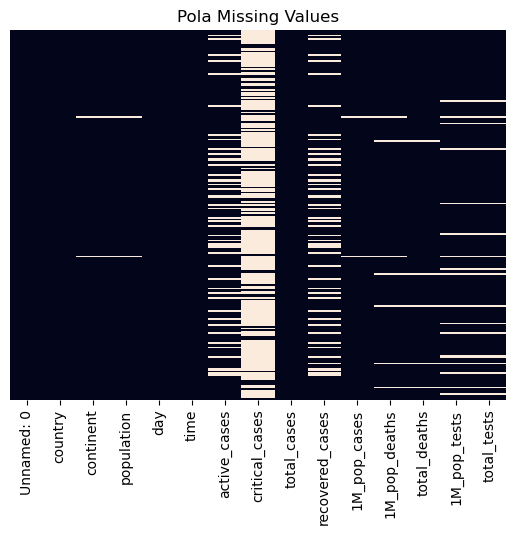

In [54]:
"""Warna hitam = tidak ada missing value
Warna putih/terang = ada missing value"""

sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Pola Missing Values")
plt.show()

Check Duplicated Data

In [55]:
df.duplicated().sum()

np.int64(0)

In [56]:
df["continent"].unique()

array(['Asia', 'Europe', 'Africa', 'North-America', 'South-America',
       'Oceania', nan], dtype=object)

## DATA PREPROCESSING

Drop Columns

In [57]:
df.drop(columns=["Unnamed: 0", "critical_cases", "day", "time"], axis=1, inplace=True)

Fix Missing Values

In [58]:
df["continent"] = df["continent"].fillna(df["continent"].mode()[0])
df["population"] = df["population"].fillna(df["population"].median())
df["1M_pop_cases"] = df["1M_pop_cases"].fillna(df["1M_pop_cases"].median())
df["1M_pop_deaths"] = df["1M_pop_deaths"].fillna(df["1M_pop_deaths"].median())
df["total_deaths"] = df["total_deaths"].fillna(df["total_deaths"].median())
df["1M_pop_tests"] = df["1M_pop_tests"].fillna(df["1M_pop_tests"].median())
df["total_tests"] = df["total_tests"].fillna(df["total_tests"].median())

imputer = SimpleImputer(strategy="median")

df[["active_cases","recovered_cases"]] = imputer.fit_transform(df[["active_cases","recovered_cases"]])

In [59]:
df.isnull().sum()

country            0
continent          0
population         0
active_cases       0
total_cases        0
recovered_cases    0
1M_pop_cases       0
1M_pop_deaths      0
total_deaths       0
1M_pop_tests       0
total_tests        0
dtype: int64

## EDA

Separating Features

In [60]:
numericalFeatures = [feature for feature in df.select_dtypes(include=["number"]).columns]
categoricalFeatures = [feature for feature in df.select_dtypes(include=["object"]).columns]

In [61]:
features = pd.DataFrame({
    "Numerical" : pd.Series(feature for feature in numericalFeatures),
    "Categorical" : pd.Series(feature for feature in categoricalFeatures)
})
features

,Numerical,Categorical
0,population,country
1,active_cases,continent
2,total_cases,NaN
3,recovered_cases,NaN
4,1M_pop_cases,NaN
5,1M_pop_deaths,NaN
6,total_deaths,NaN
7,1M_pop_tests,NaN
8,total_tests,NaN


In [62]:
f"Numerical : {len(numericalFeatures)}", f"Categorical : {len(categoricalFeatures)}"

('Numerical : 9', 'Categorical : 2')

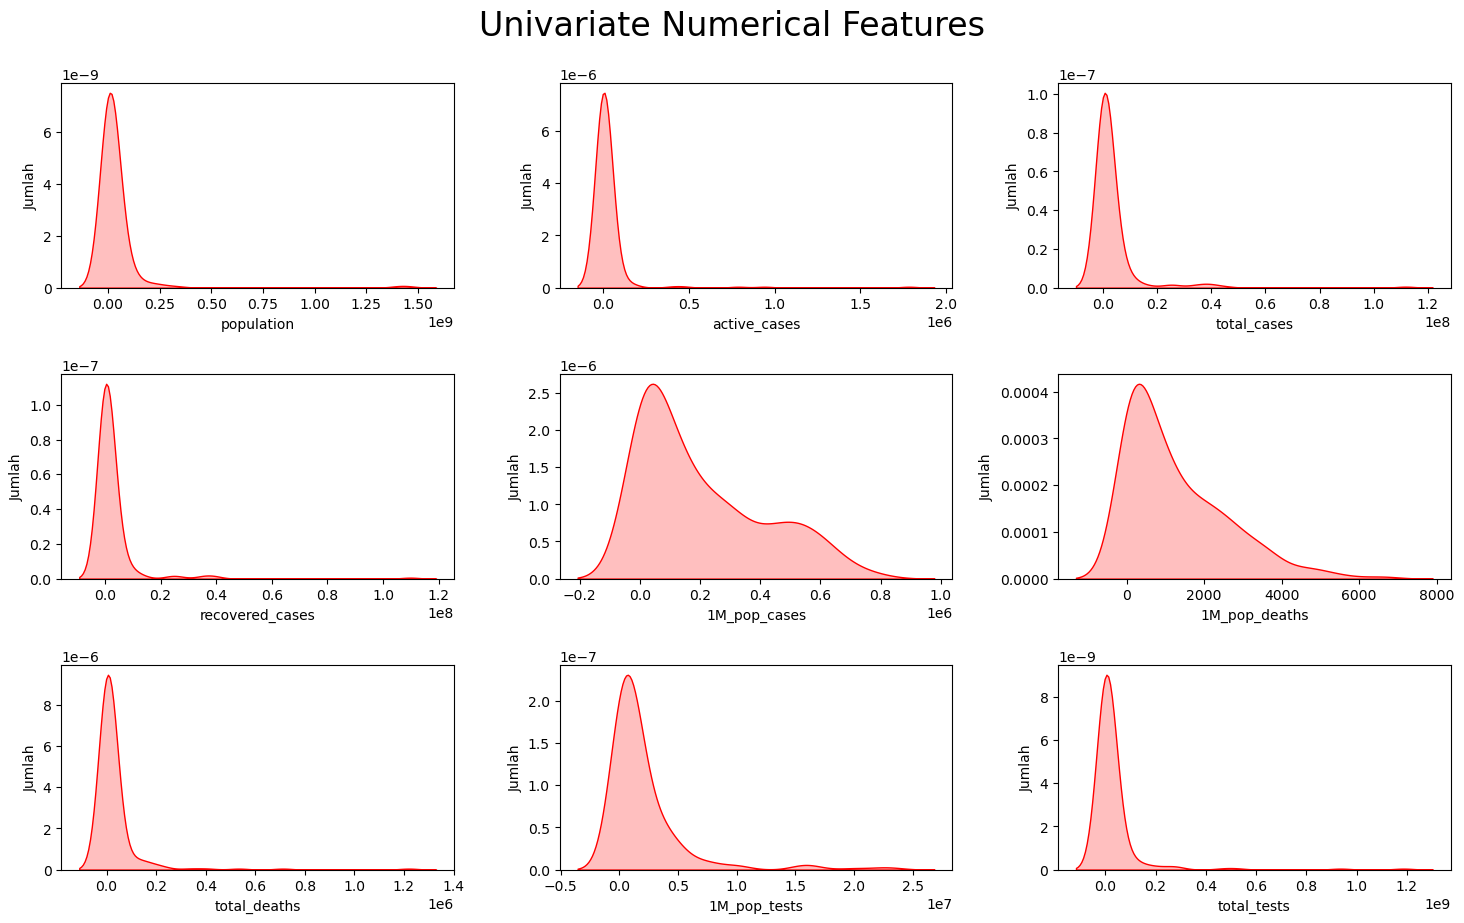

In [63]:
# Visualisasi Numerical Features
plt.figure(figsize=(15, 15))
plt.suptitle("Univariate Numerical Features", fontsize=24)
for i, feature in enumerate(numericalFeatures):
    plt.subplot(5, 3, i + 1)
    sns.kdeplot(x=df[feature], fill=True, color='r')
    # sns.histplot(df[numericalFeatures], kde=True, bins=40)
    plt.tight_layout(pad=2)
    plt.xlabel(feature)
    plt.ylabel("Jumlah")
plt.show()

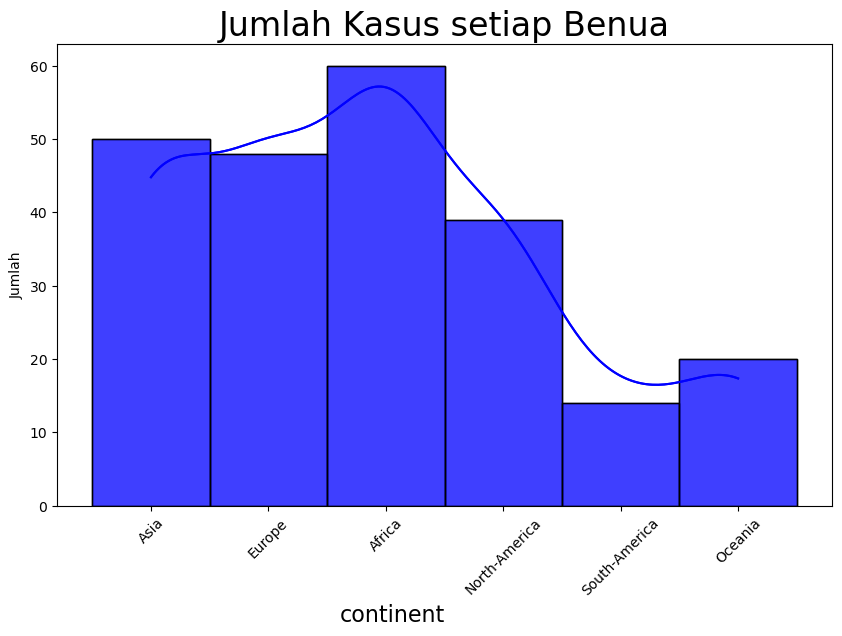

In [64]:
plt.figure(figsize=(10, 6))
for i in range(len(categoricalFeatures)):
    plt.title("Jumlah Kasus setiap Benua", fontsize=24)
    sns.histplot(df[categoricalFeatures[1]], kde=True, color="blue")
    plt.xlabel(categoricalFeatures[1], fontsize=16, ha="right")
    plt.xticks(rotation=45)
    plt.ylabel("Jumlah")
plt.show()

Visualisasi Numerical vs Categorical Features

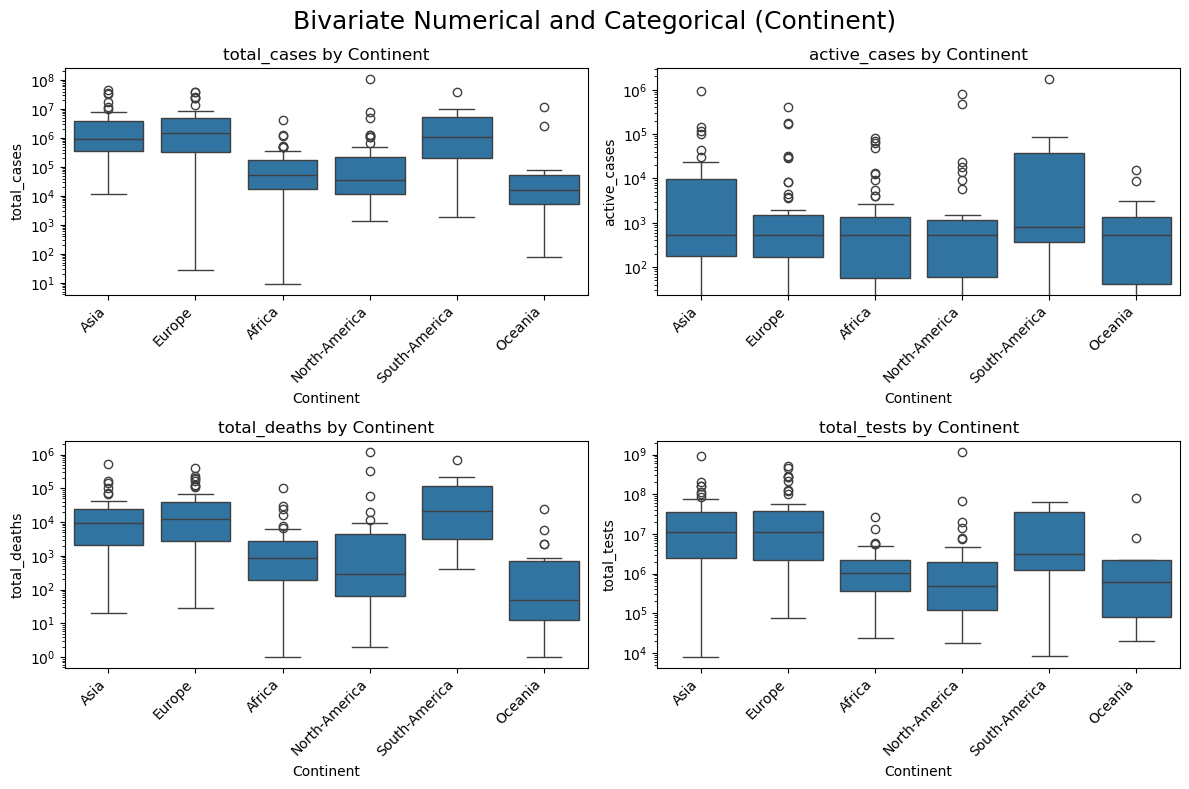

In [65]:
# Check Outliers
features = ["total_cases", "active_cases", "total_deaths", "total_tests"]
plt.figure(figsize=(12, 8))
plt.suptitle("Bivariate Numerical and Categorical (Continent)", fontsize=18)
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df["continent"], y=df[feature])
    plt.xticks(rotation=45, fontsize=10, ha="right")
    plt.yscale("log")  # Agar Distribusi Mudah Dibaca
    plt.xlabel("Continent")
    plt.ylabel(feature)
    plt.title(f"{feature} by Continent")
plt.tight_layout()
plt.show()

Visualisasi Numerical Features

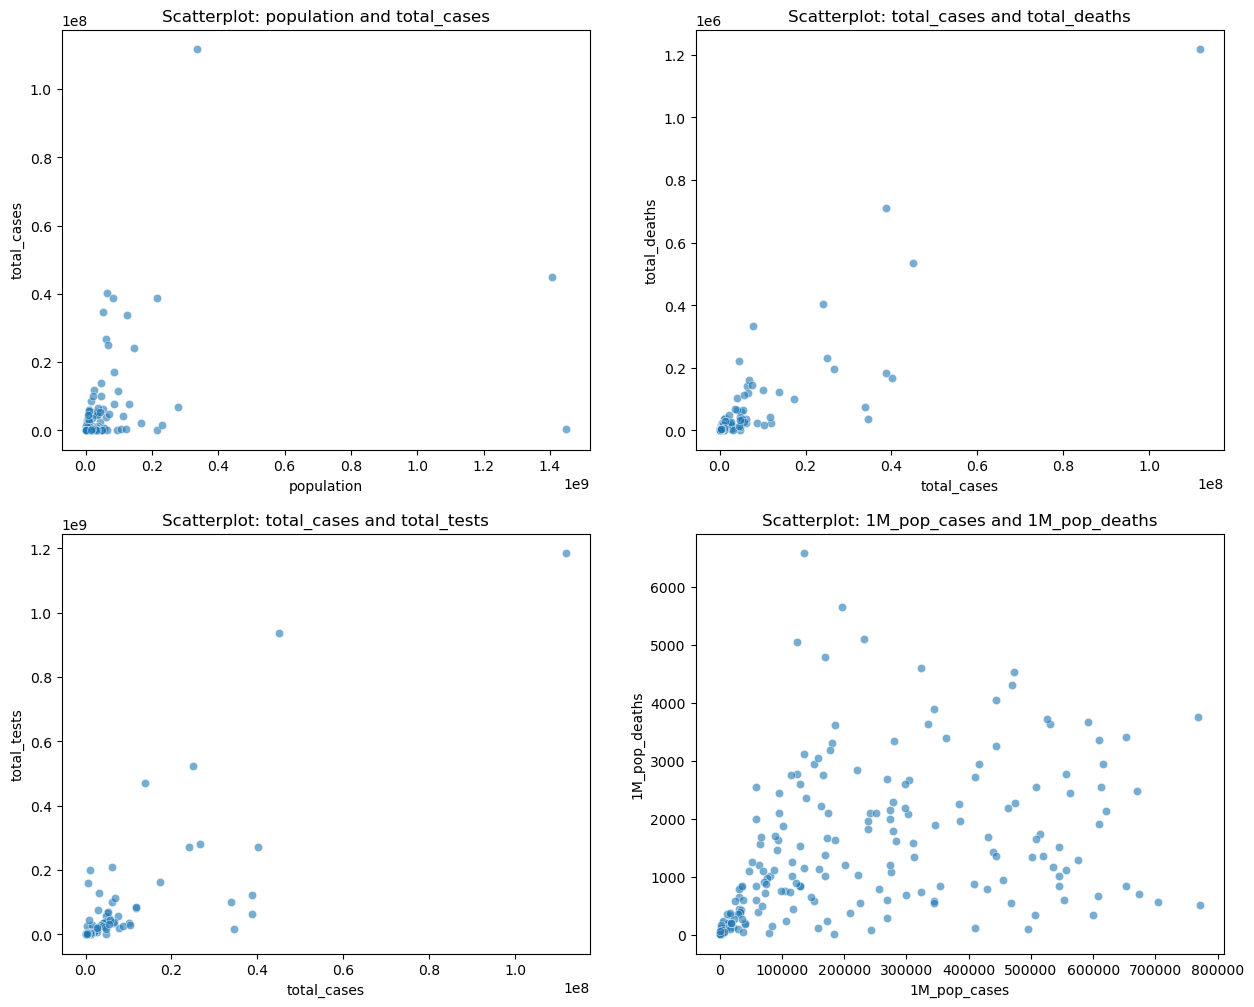

In [66]:
pairs = [
    ("population", "total_cases"),
    ("total_cases", "total_deaths"),
    ("total_cases", "total_tests"),
    ("1M_pop_cases", "1M_pop_deaths")
]

plt.figure(figsize=(15, 12))

for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=x, y=y, alpha=0.6)
    plt.title(f"Scatterplot: {x} and {y}")

plt.show()

Korelasi Heatmap

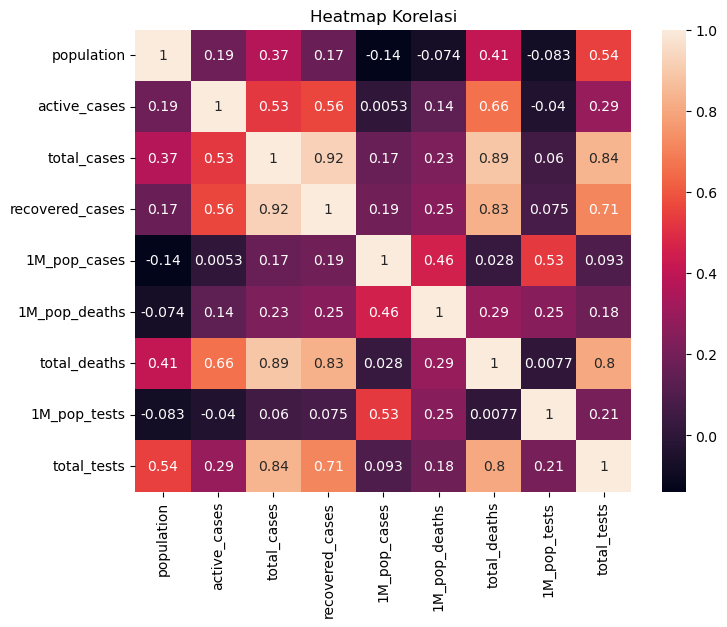

In [67]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numericalFeatures].corr(), annot=True)
plt.title("Heatmap Korelasi")
plt.show()

## DATA PREPROCESSING

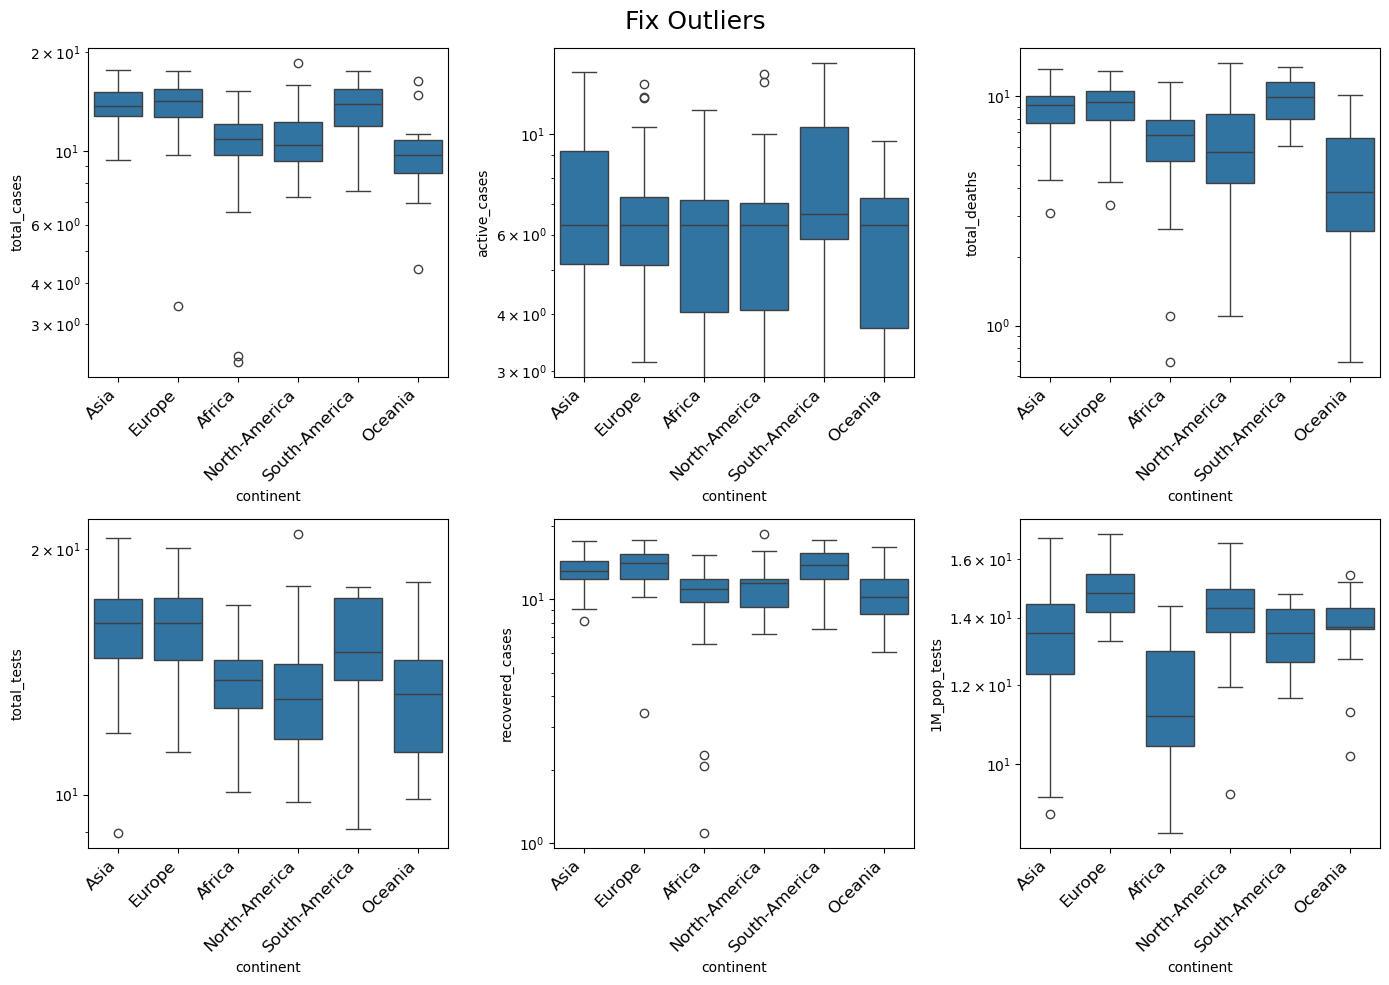

In [68]:
features = ["total_cases", "active_cases", "total_deaths", "total_tests", "recovered_cases", "1M_pop_tests"]
plt.figure(figsize=(14, 10))
plt.suptitle("Fix Outliers", fontsize=18)
for i, feature in enumerate(features):
  df[feature] = np.log1p(df[feature]) #->memperbaiki outliers
  plt.subplot(2, 3, i+1)
  sns.boxplot(x=df["continent"], y=df[feature], data=df)
  plt.xticks(fontsize=12, ha="right", rotation=45)
  plt.yscale("log")
  plt.tight_layout()
plt.show()

Encode Categorical Continent(One Hot Encoder)

In [69]:
# encode = OneHotEncoder()
# encodedContinent = encode.fit_transform(df[["continent"]]).toarray()

ct = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(drop="first", sparse_output=False), ["continent"])
    ],
    remainder="passthrough"
)

encodedContinent = ct.fit_transform(df)

In [70]:
df = pd.DataFrame(
    encodedContinent,
    columns = ct.get_feature_names_out()
)

Remove encoder and remainder text

In [71]:
df.columns = df.columns.str.replace("encoder__", "")
df.columns = df.columns.str.replace("remainder__", "")

In [72]:
df.head()

,continent_Asia,continent_Europe,continent_North-America,continent_Oceania,continent_South-America,country,population,active_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
0,1.0,0.0,0.0,0.0,0.0,Afghanistan,40754388.0,9.622384,12.363824,12.259997,5746.0,196.0,8.986822,10.437815,14.14534
1,0.0,1.0,0.0,0.0,0.0,Albania,2866374.0,6.933423,12.72148,12.707557,116825.0,1258.0,8.190354,13.425684,14.478731
2,0.0,0.0,0.0,0.0,0.0,Algeria,45350148.0,11.315316,12.513598,12.11758,5998.0,152.0,8.836665,8.535819,12.350004
3,0.0,1.0,0.0,0.0,0.0,Andorra,77463.0,6.291569,10.77929,12.139286,619844.0,2130.0,5.111988,14.986523,12.428572
4,0.0,0.0,0.0,0.0,0.0,Angola,35027343.0,7.586804,11.583645,11.546554,3064.0,55.0,7.569412,10.664737,14.22084


TargetOrdinalEncoding

In [73]:
meanTotalCases=df.groupby('country')['total_cases'].mean()

In [74]:
meanTotalCases

country
Afghanistan          12.363824
Albania               12.72148
Algeria              12.513598
Andorra               10.77929
Angola               11.583645
                       ...    
Wallis-and-Futuna     8.174985
Western-Sahara        2.397895
Yemen                 9.388152
Zambia               12.763701
Zimbabwe             12.492604
Name: total_cases, Length: 231, dtype: object

In [75]:
df["country"] = df["country"].map(meanTotalCases)

In [76]:
df.head()

,continent_Asia,continent_Europe,continent_North-America,continent_Oceania,continent_South-America,country,population,active_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
0,1.0,0.0,0.0,0.0,0.0,12.363824,40754388.0,9.622384,12.363824,12.259997,5746.0,196.0,8.986822,10.437815,14.14534
1,0.0,1.0,0.0,0.0,0.0,12.72148,2866374.0,6.933423,12.72148,12.707557,116825.0,1258.0,8.190354,13.425684,14.478731
2,0.0,0.0,0.0,0.0,0.0,12.513598,45350148.0,11.315316,12.513598,12.11758,5998.0,152.0,8.836665,8.535819,12.350004
3,0.0,1.0,0.0,0.0,0.0,10.77929,77463.0,6.291569,10.77929,12.139286,619844.0,2130.0,5.111988,14.986523,12.428572
4,0.0,0.0,0.0,0.0,0.0,11.583645,35027343.0,7.586804,11.583645,11.546554,3064.0,55.0,7.569412,10.664737,14.22084


Split Data Into X and Y

In [77]:
x = df.iloc[:, 6:-1]
y = df.iloc[:, -1]

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

Feature Scaling

In [79]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [80]:
x_train

array([[-0.25225528, -1.75198372, -0.82852072, ..., -0.10712676,
        -1.13357846,  0.94207064],
       [-0.23927282,  0.94825993, -0.55161452, ..., -0.69692035,
        -0.33401603, -0.53610112],
       [-0.0195585 ,  0.10424837,  0.66408618, ..., -0.61156672,
         0.76426523, -0.24181624],
       ...,
       [-0.19340947,  1.27981938,  0.85362161, ...,  3.37786199,
         1.15267622,  0.41789917],
       [-0.25129651, -0.97336987, -1.12207651, ..., -0.68070316,
        -1.10643822, -0.76093678],
       [-0.08146911, -0.58060929, -0.24676363, ..., -0.95468831,
        -0.28329197, -1.1648442 ]], shape=(161, 8))

## LINEAR REGRESSION

In [81]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


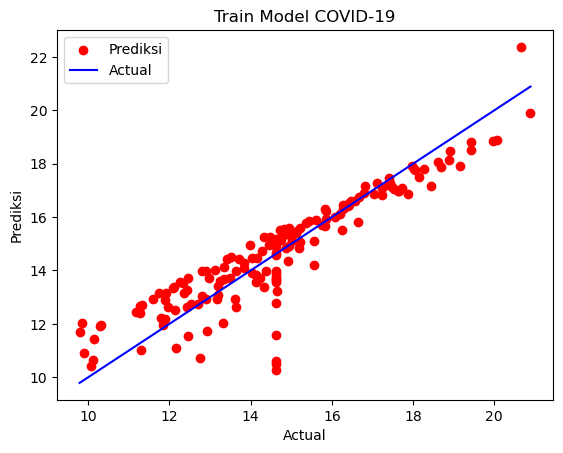

In [82]:
plt.scatter(y_train, model.predict(x_train), color="red", label="Prediksi")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="blue", label="Actual")
plt.xlabel("Actual")
plt.ylabel("Prediksi")
plt.title("Train Model COVID-19")
plt.legend()
plt.show()

In [83]:
y_pred = model.predict(x_test)

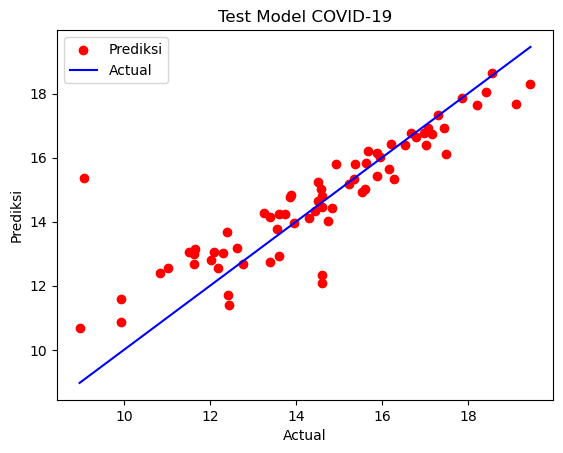

In [84]:
plt.scatter(y_test, y_pred, color="red", label="Prediksi")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="blue", label="Actual")
plt.xlabel("Actual")
plt.ylabel("Prediksi")
plt.title("Test Model COVID-19")
plt.legend()
plt.show()

## EVALUATION MODEL

In [85]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mae,"\n")
print(mse,"\n")
print(r2)

0.7565400009548284 

1.3244055531386574 

0.7690587294143973
